<a href="https://colab.research.google.com/github/lionelsamrat10/machine-learning-a-to-z/blob/main/Reinforcement%20Learning/Thompson%20Sampling/Copy_of_thompson_sampling_samrat_for_10000_rounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [4]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d # Contains the count of number of times ad i received reward 1
numbers_of_rewards_0 = [0] * d # Contains the count of number of times ad i received reward 0
total_reward = 0
for n in range(0, N):
  ad = 0 # index of the ad that is selected after each round n
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if(random_beta > max_random):
      max_random = random_beta
      ad = i # This is the ad that is selected
  # Add the selected ad in the ads_selected array
  ads_selected.append(ad)
  reward = dataset.values[n, ad] # The reward is stored at nth row and ad column
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else: 
    numbers_of_rewards_0[ad] += 1
  total_reward += reward

## Visualising the results - Histogram

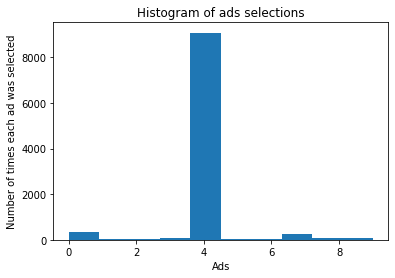

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()